# Assignment 6: Implement Dijkstra's Algorithm


In this exercise, we will explore Dijkstra's Algorithm in terms of hash maps and computational complexity.  The base code is described in Chapter 7 of Grokking Algorithms (Bhargava 2016).  

## Deliverables:

 

    1) Use the breadth-first algorithm to find the quickest way to get to L.A from NYC and calculate the time that it will take to get to L.A. from NYC using the breadth first algorithm.  (Even though BFS does not use weighted edges, we will indirectly use them to calculate the time of the route).

    2) Print the route e.g. NYC -> DC -> ATL etc -> L.A.
    
    3) Next, use Dijkstra's algorithm to find the most optimal route to get to L.A from NYC, capture the time that it will take to get to L.A (use the weights in the algorithm assigned to the routes).

    4) Print the route e.g. NYC -> DC -> ATL etc -> L.A.
    
    5) Compare time of Breadth-first algorithm with Dijkstra's algorithm in terms of trip time, stops, computation complexity.  Discuss the reason for differences in methods.

    6) Use Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance.


    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports and tree generation

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import time

import random
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from collections import deque


# B. Assemble and draw Graph

In [2]:
G = nx.DiGraph()
G.add_edge('NYC' ,'DC', weight = 2 )
G.add_edge('NYC' ,'Indianapolis', weight = 11 )
G.add_edge('NYC' ,'Pittsburg', weight = 7 )

G.add_edge('DC', 'Atlanta', weight = 2)
G.add_edge('Indianapolis', 'KansasCity', weight = 8)
G.add_edge('Pittsburg', 'Cincinnati', weight= 6)

G.add_edge('Atlanta', 'NewOrleans', weight=2)
G.add_edge('KansasCity', 'Denver', weight=7)
G.add_edge('Cincinnati', 'StLouis', weight=8)

G.add_edge('NewOrleans', 'Dallas', weight=2)
G.add_edge('Denver', 'SaltLakeCity', weight=6)
G.add_edge('StLouis', 'OklahomaCity', weight=7)

G.add_edge('Dallas', 'Albuquerque', weight=2)
G.add_edge('SaltLakeCity', 'LasVegas', weight=9)
G.add_edge('OklahomaCity', 'Albuquerque', weight=9)

G.add_edge('Albuquerque', 'Phoenix', weight=2)
G.add_edge('LasVegas', 'SanDiego', weight=2)
G.add_edge('LasVegas', 'LosAngeles', weight=5)

G.add_edge('Phoenix', 'SanDiego', weight=5)
G.add_edge('Phoenix', 'LasVegas', weight=2)

G.add_edge('SanDiego', 'LosAngeles', weight=2)

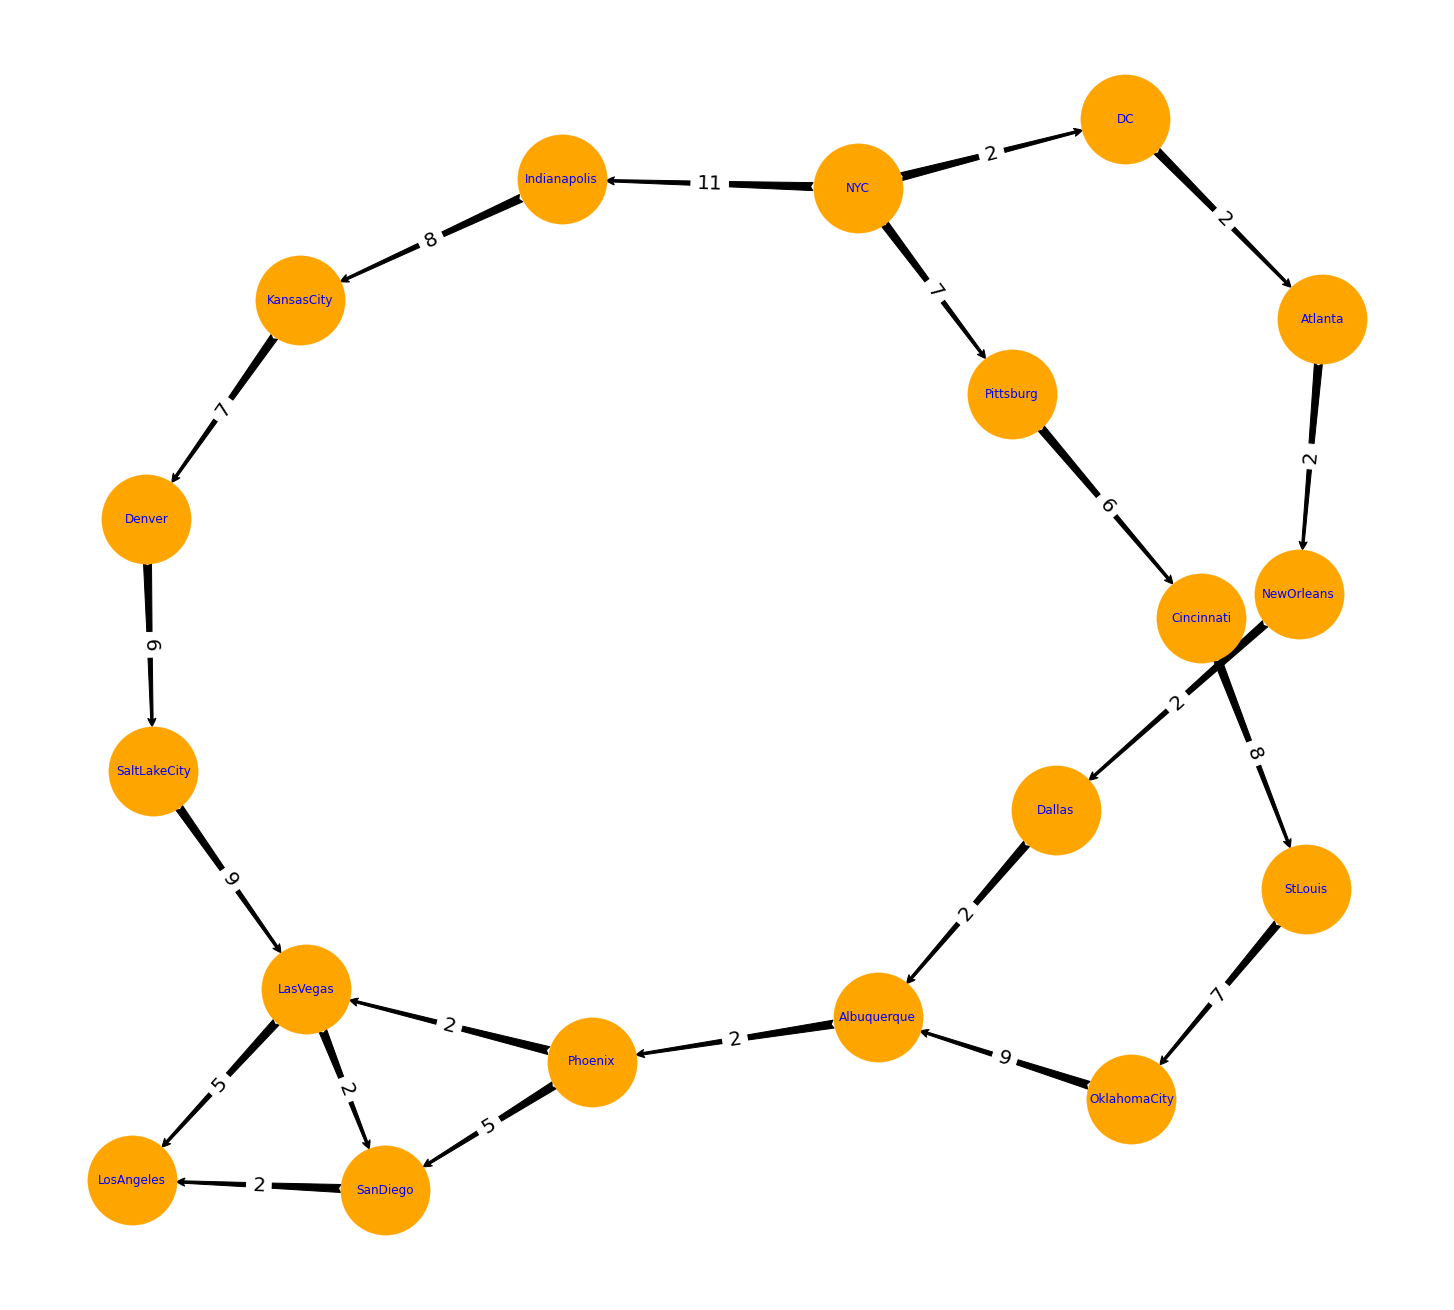

In [3]:


fig = plt.figure(figsize=(20,18), facecolor='g')
nx.draw(G, pos = graphviz_layout(G), linewidths=0.25, arrowsize=20, arrowstyle='fancy', node_size=8000, node_color='orange', node_shape='o', font_color='b', font_size=12,  with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos= graphviz_layout(G), edge_labels=labels, font_size=20)
plt.show()


# C. Functions for Breadth First Seach, lowest cost node, and the path finder for the parent tree.


In [4]:
def search_graph(G, initial = 'NYC', final='LosAngeles'):
    search_queue = [[initial]]
    searched_list = []
    start = time.perf_counter() 

    while search_queue:
        path = search_queue.pop(0) # Gets the first path in the queue

        vertex = path[-1] # Gets the last node in the path
        
        if vertex == final: # if there is a match between the final node and the vertex we are on, end and return the path , last vertex and duration
            end= time.perf_counter()
            duration = (end-start)*1E3
            return path, vertex,  duration

        elif vertex not in searched_list:# check if current node has not been visited
            
            for neighbour in G.get(vertex, []): # for the neighbor nodes add them to the queue
                new_path = list(path)
                new_path.append(neighbour)
                search_queue.append(new_path)

            # Mark the vertex as visited
            searched_list.append(vertex) #add the searched vertex to the searched list


def find_lowest_cost_node(costs):
    lowest_cost = float("inf") #initialize to infinity
    lowest_cost_node = None  #set lowest node to none
    # Go through each node.
    for node in costs: #get the cost for each node and if it's lowest and not been visited set it to the lowest cost and lowest node, returning the lowest cost node
        cost = costs[node]
        if cost < lowest_cost and node not in processed:
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node


def find_path(parents, start, end): #function to return the path to the specified node by reading backwards through the parents
    path = [start] #put start node in the path
    temp = start #store start as the temporary node
    if start not in parents.keys(): #check to see if start node was not in the parent keys
        print('The start node is not in the graph')
    elif end not in parents.values(): # check to see if end node was not in the parent keys
        print('The end node is not in the graph')
    else: # if both are present and while the temp node is not the end node get the nodes value, append to search list and then reset the temp node to the valude obtained in parents
        while temp != end: 
            searchnode=parents.get(temp)
            path.append(searchnode)
            temp = searchnode
    return path[::-1] #reverse the path so that it originates from NYC









# D. Assignment Code

###
    Dispite being able to visualize these weights and node connections really nicely, The manipulation of the Digraph class isn't extremely friendly. 
    So I opted to continue this exercise with the manual construction below. It does provide a nice internal method for the dijkstra algorithm though that can serve as a benchmark performance.

## D1. Benchmark experiment: Builtin algo performance

In [5]:
start= time.perf_counter()
nx.dijkstra_path(G, 'NYC', 'LosAngeles')
end= time.perf_counter()
builtin_duration = (end-start)*1E3


In [6]:
edges = list(G.edges())

graph = {}

for key, val in edges:
    graph.setdefault(key,[]).append(val)

In [7]:
graph

{'NYC': ['DC', 'Indianapolis', 'Pittsburg'],
 'DC': ['Atlanta'],
 'Indianapolis': ['KansasCity'],
 'Pittsburg': ['Cincinnati'],
 'Atlanta': ['NewOrleans'],
 'KansasCity': ['Denver'],
 'Cincinnati': ['StLouis'],
 'NewOrleans': ['Dallas'],
 'Denver': ['SaltLakeCity'],
 'StLouis': ['OklahomaCity'],
 'Dallas': ['Albuquerque'],
 'SaltLakeCity': ['LasVegas'],
 'OklahomaCity': ['Albuquerque'],
 'Albuquerque': ['Phoenix'],
 'LasVegas': ['SanDiego', 'LosAngeles'],
 'Phoenix': ['SanDiego', 'LasVegas'],
 'SanDiego': ['LosAngeles']}

In [8]:
nodes = dict(G.nodes()) # atleast I can salvage the nodes!

graph2 = nodes
graph2

{'NYC': {},
 'DC': {},
 'Indianapolis': {},
 'Pittsburg': {},
 'Atlanta': {},
 'KansasCity': {},
 'Cincinnati': {},
 'NewOrleans': {},
 'Denver': {},
 'StLouis': {},
 'Dallas': {},
 'SaltLakeCity': {},
 'OklahomaCity': {},
 'Albuquerque': {},
 'LasVegas': {},
 'Phoenix': {},
 'SanDiego': {},
 'LosAngeles': {}}

## D2. Build all the edge weights

In [9]:
graph2['NYC']['DC'] = 2
graph2['NYC']['Indianapolis'] = 11
graph2['NYC']['Pittsburg'] = 7

graph2['DC']['Atlanta'] = 2
graph2['Indianapolis']['KansasCity'] = 8
graph2['Pittsburg']['Cincinnati'] = 6

graph2['Atlanta']['NewOrleans'] = 2
graph2['KansasCity']['Denver'] = 7
graph2['Cincinnati']['StLouis'] = 8

graph2['NewOrleans']['Dallas'] = 2
graph2['Denver']['SaltLakeCity'] = 6
graph2['StLouis']['OklahomaCity'] = 7

graph2['Dallas']['Albuquerque'] = 2
graph2['SaltLakeCity']['LasVegas'] = 9
graph2['OklahomaCity']['Albuquerque'] = 9

graph2['Albuquerque']['Phoenix'] = 2
graph2['LasVegas']['SanDiego'] = 2
graph2['LasVegas']['LosAngeles'] = 5

graph2['Phoenix']['SanDiego'] = 5
graph2['Phoenix']['LasVegas'] = 2

graph2['SanDiego']['LosAngeles'] = 2




## D3. Our Graph and Initilization of the parents and costs table

In [10]:
graph2 # now we have our dictionary of dictionaries with weights as the inner values.

{'NYC': {'DC': 2, 'Indianapolis': 11, 'Pittsburg': 7},
 'DC': {'Atlanta': 2},
 'Indianapolis': {'KansasCity': 8},
 'Pittsburg': {'Cincinnati': 6},
 'Atlanta': {'NewOrleans': 2},
 'KansasCity': {'Denver': 7},
 'Cincinnati': {'StLouis': 8},
 'NewOrleans': {'Dallas': 2},
 'Denver': {'SaltLakeCity': 6},
 'StLouis': {'OklahomaCity': 7},
 'Dallas': {'Albuquerque': 2},
 'SaltLakeCity': {'LasVegas': 9},
 'OklahomaCity': {'Albuquerque': 9},
 'Albuquerque': {'Phoenix': 2},
 'LasVegas': {'SanDiego': 2, 'LosAngeles': 5},
 'Phoenix': {'SanDiego': 5, 'LasVegas': 2},
 'SanDiego': {'LosAngeles': 2},
 'LosAngeles': {}}

In [11]:
#intiailize all of the costs/weights first level only is initialized for the algo.

infinity = float("inf")

costs = {}

costs['DC'] = 2
costs['Atlanta'] = infinity
costs['NewOrleans'] = infinity
costs['Dallas'] = infinity
costs['Indianapolis'] = 11
costs['KansasCity'] = infinity
costs['Denver'] = infinity
costs['Pittsburg'] = 7
costs['Cincinnati'] = infinity
costs['StLouis'] = infinity
costs['OklahomaCity'] = infinity
costs['Albuquerque'] = infinity
costs['SaltLakeCity'] = infinity
costs['Phoenix'] = infinity
costs['LasVegas'] = infinity
costs['SanDiego'] = infinity
costs['LosAngeles'] = infinity

In [12]:
# Intialize our parents table to collect the parents and child nodes.

parents = {}

parents['DC'] = "NYC"
parents['Atlanta'] = None
parents['NewOrleans'] = None
parents['Dallas'] = None
parents['Indianapolis'] = "NYC"
parents['KansasCity'] = None
parents['Denver'] = None
parents['Pittsburg'] = "NYC"
parents['Cincinnati'] = None
parents['StLouis'] = None
parents['OklahomaCity'] = None
parents['Albuquerque'] = None
parents['SaltLakeCity'] = None
parents['Phoenix'] = None
parents['LasVegas'] = None
parents['SanDiego'] = None
parents['LosAngeles'] = None


# initializes an empty list to collect nodes that have been visited.
processed = []


## Breadth First Search

In [13]:
BFS_return = search_graph(G=graph , initial= 'NYC', final='LosAngeles')
BFS_path = BFS_return[0]
BFS_nodes = len(BFS_path)
BFS_time = BFS_return[2]

print('using BFS, the path is:', BFS_path, 'time required (ms) is:', round(BFS_time, 3))


using BFS, the path is: ['NYC', 'Indianapolis', 'KansasCity', 'Denver', 'SaltLakeCity', 'LasVegas', 'LosAngeles'] time required (ms) is: 0.02


In [14]:
#if time start here to gather the weights for each successive edge
BFS_weight =  G.get_edge_data('NYC', 'Indianapolis').get('weight')+ G.get_edge_data('Indianapolis', 'KansasCity').get('weight')+ G.get_edge_data('KansasCity', 'Denver').get('weight')+ G.get_edge_data('Denver', 'SaltLakeCity').get('weight')+ G.get_edge_data('SaltLakeCity', 'LasVegas').get('weight')+ G.get_edge_data('LasVegas', 'LosAngeles').get('weight')

BFS_weight

46

## D. Dijkstras Algo

In [15]:
dj_start = time.perf_counter()

node = find_lowest_cost_node(costs)

# If you've processed all the nodes, this while loop is done.
while node is not None: #while there is a node get it's cost and  neighbors
    cost = costs[node]
    neighbors = graph2[node]
    for n in neighbors.keys(): #for each neighbor calculate a new cost
        new_cost = cost + neighbors[n] 
        
        if costs[n] > new_cost: #If the original cost was larger than the new cost reset the orginal cost to be the new cost then update it's parent node
            costs[n] = new_cost
            parents[n] = node 
    
    processed.append(node) # add the node to the processed list
   
    node = find_lowest_cost_node(costs) # recursive call to process the next node



dijkstra_path = find_path(parents, start='LosAngeles', end='NYC')
dj_end = time.perf_counter()
number_nodes_dijkstra = len(dijkstra_path)
dijkstra_weight = costs.get('LosAngeles')

dj_duration = (dj_end - dj_start)*1E3


print('The path for the Dijkstra Algorithm is: ', dijkstra_path)

The path for the Dijkstra Algorithm is:  ['NYC', 'DC', 'Atlanta', 'NewOrleans', 'Dallas', 'Albuquerque', 'Phoenix', 'LasVegas', 'SanDiego', 'LosAngeles']


In [16]:
summary = {
    'Algo': ['Breadth_First', 'Dijkstra', 'Dijkstra_builtin'], 
    'Time(ms)': [BFS_time, dj_duration, builtin_duration],
    #'Path': [BFS_path, dijkstra_path, dijkstra_path],
    'NodesTraversed': [BFS_nodes, number_nodes_dijkstra, number_nodes_dijkstra],
    'Distance': [BFS_weight, dijkstra_weight, dijkstra_weight]
}

df = pd.DataFrame.from_dict(summary)

### Table 1: A summary of the Algorithm Performances

In [17]:
df

,Algo,Time(ms),NodesTraversed,Distance
0,Breadth_First,0.0195,7,46
1,Dijkstra,0.2241,10,18
2,Dijkstra_builtin,0.1052,10,18


### Figure 2: Algorithm Performance; Nodes Traversed

<AxesSubplot:xlabel='Algo', ylabel='NodesTraversed'>

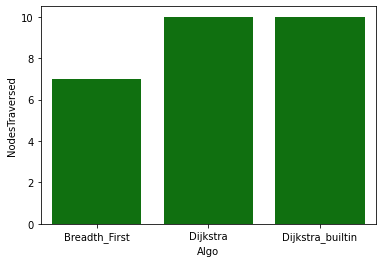

In [18]:
sns.barplot(data = df, x='Algo', color='g', y='NodesTraversed')

### Figure 3: Algorithm Performance; Time(ms)

<AxesSubplot:xlabel='Algo', ylabel='Time(ms)'>

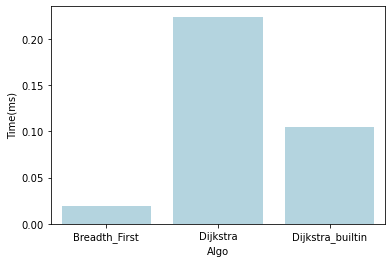

In [19]:
sns.barplot(data = df, x='Algo', color='lightblue', y='Time(ms)')

### Figure 4: Algorithm PErformance; Distance/Weights of the Paths

<AxesSubplot:xlabel='Algo', ylabel='Distance'>

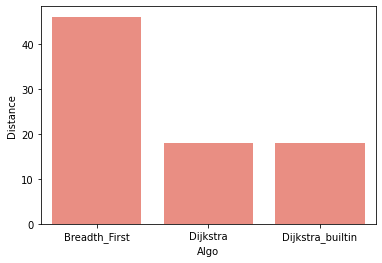

In [20]:
sns.barplot(data = df, x='Algo', color='salmon', y='Distance')

In [21]:
long_df = df.melt(id_vars=['Algo'])
long_df

,Algo,variable,value
0,Breadth_First,Time(ms),0.0195
1,Dijkstra,Time(ms),0.2241
2,Dijkstra_builtin,Time(ms),0.1052
3,Breadth_First,NodesTraversed,7.0000
4,Dijkstra,NodesTraversed,10.0000
5,Dijkstra_builtin,NodesTraversed,10.0000
6,Breadth_First,Distance,46.0000
7,Dijkstra,Distance,18.0000
8,Dijkstra_builtin,Distance,18.0000


### Figure 5: Summary of Algorithm Performance (logscale)

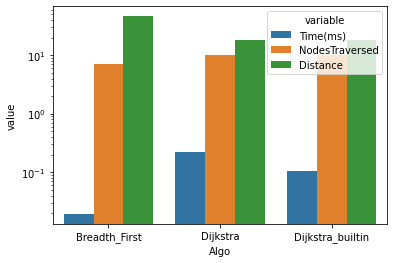

In [22]:
plot = sns.barplot(data = long_df, x='Algo', hue='variable', y='value')
plot.set_yscale('log')


# C. Discussion

Two algorithms were developed to demonstrate the difference between searching for the fewest number of nodes traversed and the shortest path (breadth first search versus Dijkstra's algorithm). In breadth first search (BFS) for a given parent node we add it's children to a queue until we reach our destination element. The shortest path is thus the fewest nodes that must be traveresed. In directed graphs another approach should be utilized. Directed graphs contain edges that have weights/distances/costs associated with them. Traversing a long edge should cost more than a shorter one. Dijkstra's algorithm utlizes a set of tables to inventory the parents of a given node and the cost of moving from the parent to the child. In directed graphs there are often multiple edges that can be traversed to reach a given vertex within a network. As such it may be actually shorter in terms of the total length/weight of edges that one needs to traverse if they first pass through other nodes. Dijkstras algorithm is greedy, it finds locally optimal minimums (lowest cost node). It loggs those local minimums within the costs table, updating/replacing any previous entries as neccessary. This difference is apparent when comparing the two algorithms in terms of the number of nodes traversed which is shown in Table 1 and graphically in Figure 2. However, notice how the cumulative distance of traversing fewer nodes is longer in terms of distance/weight/cost, again shown in Table 1 and Figure 4. The computational complexity of the algorithms are:

    BFS = O(V+E)
    Dijkstra's Algorithm = O(V+E*log(V))

It is more costly in terms of time complexity to perform the Dijkstra algorithm, but the two algorithms have different use cases: whether we want to traverse the fewest number of nodes, or take the shortest path. As such these algorithms are useful to engineers/ data scientists because they can be used to answer these different questions. For example breadth first search may be more appropriate for utilizing a social network like LinkedIN to find shared contacts to establish a new client relationship and breadth first search maybe server better to finding the shortest bicycle route in google maps. 


In additon, a builtin method has also been utilized to demonstrate an optimized form of the algorithm. This builtin method demonstrates a approximate 50% reduction in computation time relative to the developed algorithm. The times for all of the algorithms are displayed in Table 1 and again in Figure 4.

## Code Graveyard

In [23]:
#graph = {}


#graph['NYC'] = {'DC':2, 'Indianapolis':11, 'Pittsburg':7}

#graph['DC'] = {'Atlanta':2}
#graph['Indianapolis'] = {'KansasCity':8}
#graph['Pittsburg'] = ['Cincinnati']

#graph['Atlanta'] = {'NewOrleans':2}
#graph['KansasCity'] = {'Denver': 7}
#graph['Cincinnati'] = {'StLouis': 8}

#graph['NewOrleans']= {'Dallas': 2}
#graph['Denver']= {'SaltLakeCity':6}
#graph['StLouis'] = {'OklahomaCity':7}

#graph['Dallas'] = {'Albuquerque':2}
#graph['SaltLakeCity'] = {'LasVegas':9}
#graph['OklahomaCity'] = {'Albuquerque':9}

#graph['Albuquerque'] = {'Phoenix': 2}
#graph['LasVegas'] = {'SanDiego':2,'LosAngeles':5}

#graph['Phoenix'] = {'SanDiego':5, 'LasVegas':2}
#graph['SanDiego'] = {'LosAngeles':2}


In [24]:
### This was the lazy approach to traversing backwards from parent to child (which became the parent for the previous node)....

#a = parents.get('LosAngeles')
#b = parents.get(a)
#c = parents.get(b)
#d = parents.get(c)
#e = parents.get(d)
#f = parents.get(e)
#g = parents.get(f)
#h = parents.get(g)
#i= parents.get(h)

#print('LosAngeles', a,b,c,d,e,f,g,h,i)

In [25]:
#G = nx.from_dict_of_lists(graph)